In [1]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit']=2**128
import seaborn as sns

API_KEY = 'tYTvFTiccRfj'
PROJECT_TOKEN = 'tRhVHZCkQ_BC'
RUN_TOKEN  = 'tQk29TnXY0u6'

r = requests.get(f'https://www.parsehub.com/api/v2/projects/{PROJECT_TOKEN}/last_ready_run/data', params={'api_key':API_KEY})
#data = json.loads(r.text)

h1=pd.read_csv('H1N1.csv')
h1.head()

,H1N1_Date,H1N1_Closing_price,H1N1_Open_price
0,12/31/2009,79.36,79.54
1,12/30/2009,79.28,78.64
2,12/29/2009,78.87,78.68
3,12/28/2009,78.77,77.92
4,12/24/2009,78.05,76.86


In [2]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H1N1_Date           258 non-null    object 
 1   H1N1_Closing_price  258 non-null    float64
 2   H1N1_Open_price     257 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


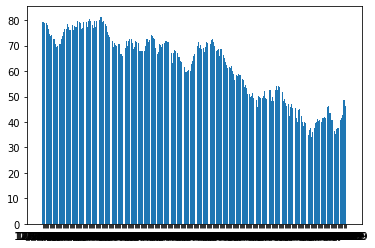

In [3]:
plt.bar(h1.H1N1_Date,h1.H1N1_Closing_price);

In [4]:
h1.sort_values(by=['H1N1_Date'])
h1.head()

,H1N1_Date,H1N1_Closing_price,H1N1_Open_price
0,12/31/2009,79.36,79.54
1,12/30/2009,79.28,78.64
2,12/29/2009,78.87,78.68
3,12/28/2009,78.77,77.92
4,12/24/2009,78.05,76.86


In [5]:
h1.rename(columns={'H1N1_Date': 'Date', 'H1N1_Closing_price': 'Closing_price','H1N1_Open_price': 'Open_price'}, inplace=True)
h1.head()

,Date,Closing_price,Open_price
0,12/31/2009,79.36,79.54
1,12/30/2009,79.28,78.64
2,12/29/2009,78.87,78.68
3,12/28/2009,78.77,77.92
4,12/24/2009,78.05,76.86


In [6]:
h1['Date']=pd.to_datetime(h1.Date)
h1.head()

,Date,Closing_price,Open_price
0,2009-12-31,79.36,79.54
1,2009-12-30,79.28,78.64
2,2009-12-29,78.87,78.68
3,2009-12-28,78.77,77.92
4,2009-12-24,78.05,76.86


In [7]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           258 non-null    datetime64[ns]
 1   Closing_price  258 non-null    float64       
 2   Open_price     257 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.2 KB


In [8]:
h1.describe()

,Closing_price,Open_price
count,258.000000,257.000000
mean,62.043062,61.987821
std,13.380865,13.363212
min,33.980000,34.520000
25%,49.725000,49.550000
50%,67.195000,66.860000
75%,72.022500,71.830000
max,81.370000,81.370000


In [9]:
h1.sort_values(by='Date',inplace=True)

In [10]:
h1.reset_index(drop=True,inplace=True)

In [11]:
h1.head()

,Date,Closing_price,Open_price
0,2009-01-02,46.34,42.66
1,2009-01-05,48.81,47.40
2,2009-01-06,48.58,48.42
3,2009-01-07,42.63,48.65
4,2009-01-08,41.70,42.66


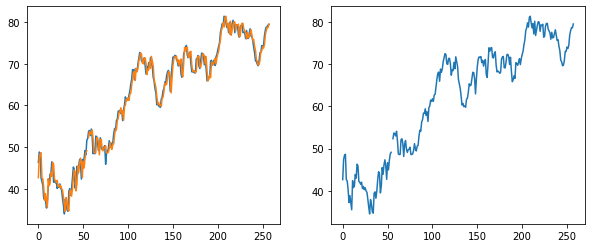

In [12]:
a=h1.Closing_price
b=h1.Open_price


plt.figure(figsize=(10, 4))  
plt.subplot(1, 2, 1)         
plt.plot(a)
plt.plot(b)
plt.subplot(1, 2, 2)
plt.plot(b)

In [13]:
h2=h1.copy()

In [14]:

h2['month']=h2.Date.dt.month

h2.head()

,Date,Closing_price,Open_price,month
0,2009-01-02,46.34,42.66,1
1,2009-01-05,48.81,47.40,1
2,2009-01-06,48.58,48.42,1
3,2009-01-07,42.63,48.65,1
4,2009-01-08,41.70,42.66,1


In [15]:
#current_year=2009
#dff=(h2[h2.Date].sort_values(by='Closing_price', ascending=True).head(10))

#fig, ax=plt.subplots(figsize=(15,8))
#ax.barh(dff.Date, dff.Closing_price);

In [16]:
h2.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [17]:
dfh1m=pd.read_csv('2007-2012.csv')
dfcom=pd.read_csv('2015-2020.csv')

In [18]:
dfh1m.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,May 2012,86.53,104.89,106.43,85.86,5.81M,-17.49%
1,Abr 2012,104.87,103.27,105.49,100.68,4.48M,1.80%
2,Mar 2012,103.02,106.82,110.55,102.13,5.74M,-3.78%
3,Feb 2012,107.07,98.38,109.95,95.44,5.54M,8.72%
4,Ene 2012,98.48,99.70,103.74,97.40,5.41M,-0.35%


In [19]:
dfcom.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,May 2020,25.65,19.56,26.73,18.05,212.34K,31.13%
1,Abr 2020,19.56,20.30,29.12,6.55,6.30M,-4.49%
2,Mar 2020,20.48,43.70,48.66,19.27,16.68M,-54.24%
3,Feb 2020,44.76,51.01,54.50,43.85,13.33M,-13.19%
4,Ene 2020,51.56,61.60,65.65,50.97,12.54M,-15.56%


In [20]:
dfh1m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fecha     61 non-null     object 
 1   Cierre    61 non-null     float64
 2   Apertura  61 non-null     float64
 3   Máximo    61 non-null     float64
 4   Mínimo    61 non-null     float64
 5   Vol.      61 non-null     object 
 6   % var.    61 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.5+ KB


In [21]:
dfh1m.drop(['Apertura','Máximo','Mínimo','Vol.','% var.'],axis=1,inplace=True)
dfcom.drop(['Apertura','Máximo','Mínimo','Vol.','% var.'],axis=1,inplace=True)

In [22]:
dfh1m

,Fecha,Cierre
0,May 2012,86.53
1,Abr 2012,104.87
2,Mar 2012,103.02
3,Feb 2012,107.07
4,Ene 2012,98.48
...,...,...
56,Sep 2007,81.66
57,Ago 2007,74.04
58,Jul 2007,78.21
59,Jun 2007,70.68


In [23]:
dfcom

,Fecha,Cierre
0,May 2020,25.65
1,Abr 2020,19.56
2,Mar 2020,20.48
3,Feb 2020,44.76
4,Ene 2020,51.56
...,...,...
56,Sep 2015,45.09
57,Ago 2015,49.20
58,Jul 2015,47.12
59,Jun 2015,59.47


In [24]:
dfcom.rename(columns={'Fecha': 'Date', 'Cierre': 'Price'}, inplace=True)
dfh1m.rename(columns={'Fecha': 'Date', 'Cierre': 'Price'}, inplace=True) 


In [25]:
dfcom.sort_values(by='Date',inplace=True)
dfcom.reset_index(drop=True,inplace=True)
dfh1m.sort_values(by='Date',inplace=True)
dfh1m.reset_index(drop=True,inplace=True)

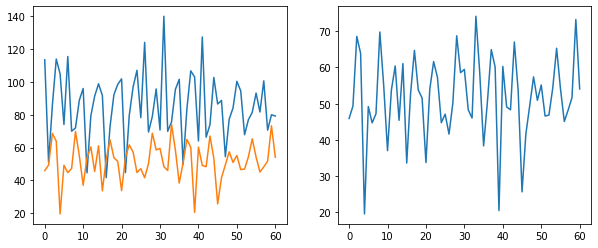

In [26]:
a=dfh1m.Price
b=dfcom.Price


plt.figure(figsize=(10, 4))  
plt.subplot(1, 2, 1)         
plt.plot(a)
plt.plot(b)
plt.subplot(1, 2, 2)
plt.plot(b)

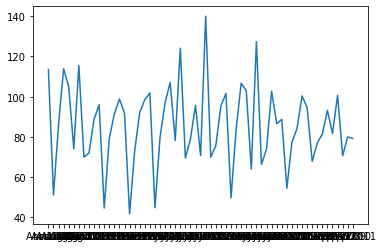

In [27]:
plt.plot(dfh1m.Date,dfh1m.Price)

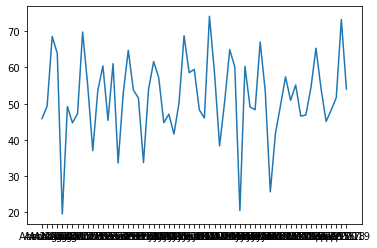

In [28]:
plt.plot(dfcom.Date,dfcom.Price)

In [29]:
dfh=pd.read_csv('05.2007-05.2012.csv')
dfc=pd.read_csv('05.2015-05.2020.csv')

In [30]:
dfh.drop(['Apertura','Máximo','Mínimo','Vol.','% var.'],axis=1,inplace=True)
dfc.drop(['Apertura','Máximo','Mínimo','Vol.','% var.'],axis=1,inplace=True)

dfc.rename(columns={'Fecha': 'Date', 'Cierre': 'Price'}, inplace=True)
dfh.rename(columns={'Fecha': 'Date', 'Cierre': 'Price'}, inplace=True)

In [31]:
dfc.head()

,Date,Price
0,13.05.2020,25.54
1,12.05.2020,25.78
2,11.05.2020,24.14
3,08.05.2020,24.74
4,07.05.2020,23.55


In [32]:
dfh.head()

,Date,Price
0,11.05.2012,96.13
1,10.05.2012,97.08
2,09.05.2012,96.81
3,08.05.2012,97.01
4,07.05.2012,97.94


In [33]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1261 non-null   object 
 1   Price   1261 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [34]:
dfc['Date']=pd.to_datetime(dfc.Date)
dfc.reset_index(drop=True,inplace=True)
dfh['Date']=pd.to_datetime(dfh.Date)
dfh.reset_index(drop=True,inplace=True)

In [35]:
dfc.sort_values(by='Date',inplace=True)
dfc.reset_index(drop=True,inplace=True)
dfh.sort_values(by='Date',inplace=True)
dfh.reset_index(drop=True,inplace=True)

In [36]:
dfh

,Date,Price
0,2007-01-06,65.08
1,2007-01-08,76.53
2,2007-01-10,80.24
3,2007-01-11,93.49
4,2007-02-07,71.09
...,...,...
1256,2012-11-04,102.70
1257,2012-11-05,96.13
1258,2012-12-01,99.10
1259,2012-12-03,106.34


In [37]:
dfc

,Date,Price
0,2015-01-06,60.20
1,2015-01-07,56.96
2,2015-01-09,45.41
3,2015-01-10,44.74
4,2015-01-12,41.85
...,...,...
1315,2020-11-03,32.98
1316,2020-11-05,24.14
1317,2020-12-02,51.17
1318,2020-12-03,31.50


In [38]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1320 non-null   datetime64[ns]
 1   Price   1320 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.8 KB


In [39]:
dft=dfc.copy()

In [40]:
#bread_group['day']=bread_group.Datetime.dt.day_name()
#bread_group['hour']=bread_group.Datetime.dt.hour
dft['month']=dft.Date.dt.month

In [41]:
dft.head()

,Date,Price,month
0,2015-01-06,60.20,1
1,2015-01-07,56.96,1
2,2015-01-09,45.41,1
3,2015-01-10,44.74,1
4,2015-01-12,41.85,1


In [42]:
dft['year']=dft.Date.dt.year

In [43]:
dft.head()

,Date,Price,month,year
0,2015-01-06,60.20,1,2015
1,2015-01-07,56.96,1,2015
2,2015-01-09,45.41,1,2015
3,2015-01-10,44.74,1,2015
4,2015-01-12,41.85,1,2015


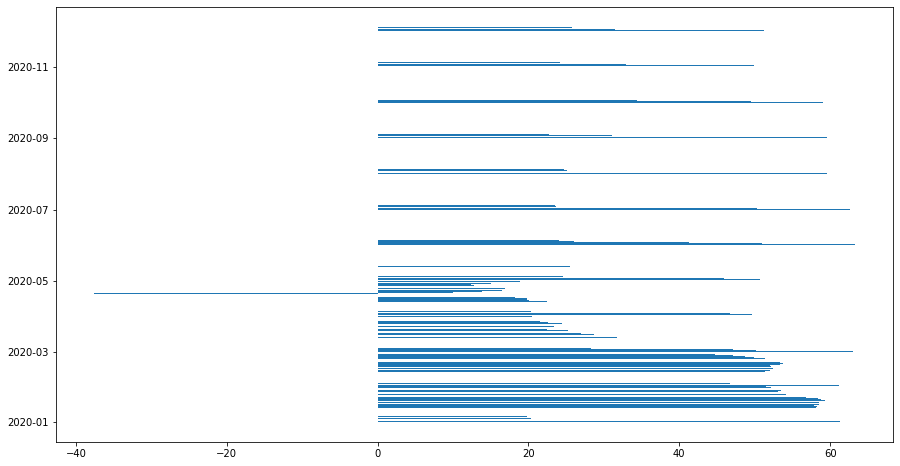

In [44]:
current_year=2020
dff=(dft[dft.year.eq(current_year)].sort_values(by='Price', ascending=True))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.Date, dff.Price);

In [45]:
dfht=pd.read_csv('05.2007-05.2012.csv')
dfct=pd.read_csv('05.2015-05.2020.csv')

In [46]:
dfht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fecha     1261 non-null   object 
 1   Cierre    1261 non-null   float64
 2   Apertura  1261 non-null   float64
 3   Máximo    1261 non-null   float64
 4   Mínimo    1261 non-null   float64
 5   Vol.      1261 non-null   object 
 6   % var.    1261 non-null   object 
dtypes: float64(4), object(3)
memory usage: 69.1+ KB


In [47]:
dfht.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,11.05.2012,96.13,96.53,97.20,95.56,260.54K,-0.98%
1,10.05.2012,97.08,96.45,97.69,96.08,282.31K,0.28%
2,09.05.2012,96.81,97.38,97.39,95.17,332.87K,-0.21%
3,08.05.2012,97.01,97.96,98.12,95.52,333.77K,-0.95%
4,07.05.2012,97.94,98.05,98.24,95.34,300.47K,-0.56%


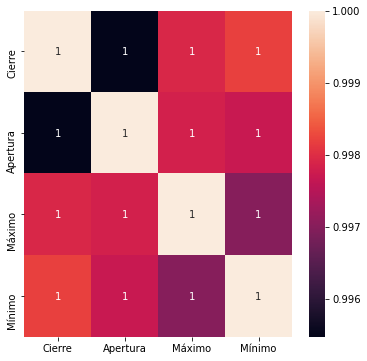

In [48]:
plt.figure(figsize=(6,6))

sns.heatmap(dfht.corr(),annot=True);

In [49]:
crude=pd.read_csv('Cushing, OK WTI Spot Price FOB (Dollars per Barrel).csv')
refiner=pd.read_csv('U.S. Crude Oil Composite Acquisition Cost by Refiners (Dollars per Barrel).csv')

In [50]:
crude.tail()

,Date,(Dollars per Barrel)
407,Dec-2019,59.88
408,Jan-2020,57.52
409,Feb-2020,50.54
410,Mar-2020,29.21
411,Apr-2020,16.55


In [51]:
refiner.tail()

,Date,U.S. Crude Oil Composite Acquisition Cost by Refiners (Dollars per Barrel)
406,Nov-2019,57.88
407,Dec-2019,60.27
408,Jan-2020,57.94
409,Feb-2020,51.29
410,Mar-2020,32.72


In [52]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  412 non-null    object 
 1   (Dollars per Barrel)  412 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


In [53]:
crude.drop(crude.tail(1).index,inplace=True)

In [54]:
stocks=pd.read_csv('stocks.csv')
stocks.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,Mar 2020,20.48,43.70,48.66,19.27,16.68M,-54.24%
1,Feb 2020,44.76,51.01,54.50,43.85,13.33M,-13.19%
2,Ene 2020,51.56,61.60,65.65,50.97,12.54M,-15.56%
3,Dic 2019,61.06,55.47,62.34,55.35,9.27M,10.68%
4,Nov 2019,55.17,54.15,58.74,54.07,9.47M,1.83%


In [55]:
stocks.drop(['Apertura','Máximo','Mínimo','Vol.','% var.'],axis=1,inplace=True)

stocks.rename(columns={'Fecha': 'Date', 'Cierre': 'Stocks_price_usd'}, inplace=True)


In [56]:
test1=stocks.copy()
test2=stocks.copy()

In [57]:
test1['Date']=pd.to_datetime(stocks.Date,dayfirst=True, errors='coerce')
test1.head()

,Date,Stocks_price_usd
0,2020-03-01,20.48
1,2020-02-01,44.76
2,NaT,51.56
3,NaT,61.06
4,2019-11-01,55.17


In [58]:
test2['Date']=test2.Date.apply(lambda x:x.replace('Ene','Jan'))
test2['Date']=test2.Date.apply(lambda x:x.replace('Dic','Dec'))
test2['Date']=test2.Date.apply(lambda x:x.replace('Abr','Apr'))
test2['Date']=test2.Date.apply(lambda x:x.replace('Ago','Aug'))

In [59]:
test2['Date']=pd.to_datetime(test2.Date)

In [60]:
test2.head()

,Date,Stocks_price_usd
0,2020-03-01,20.48
1,2020-02-01,44.76
2,2020-01-01,51.56
3,2019-12-01,61.06
4,2019-11-01,55.17


In [61]:
test2.sort_values(by='Date',inplace=True)
test2.reset_index(drop=True,inplace=True)

In [62]:
stocks['Date']=stocks.Date.apply(lambda x:x.replace('Ene','Jan'))
stocks['Date']=stocks.Date.apply(lambda x:x.replace('Dic','Dec'))
stocks['Date']=stocks.Date.apply(lambda x:x.replace('Abr','Apr'))
stocks['Date']=stocks.Date.apply(lambda x:x.replace('Ago','Aug'))
stocks['Date']=pd.to_datetime(stocks.Date)

In [63]:
stocks.sort_values(by='Date',inplace=True)
stocks.reset_index(drop=True,inplace=True)
stocks.head()

,Date,Stocks_price_usd
0,1986-01-01,18.83
1,1986-02-01,13.26
2,1986-03-01,10.42
3,1986-04-01,13.34
4,1986-05-01,14.30


In [64]:
stocks2=stocks.copy()

In [65]:
stocks['Year']=stocks.Date.dt.year
stocks['Month']=stocks.Date.dt.month
stocks.drop(['Date'],axis=1,inplace=True)
stocks.head()

,Stocks_price_usd,Year,Month
0,18.83,1986,1
1,13.26,1986,2
2,10.42,1986,3
3,13.34,1986,4
4,14.30,1986,5


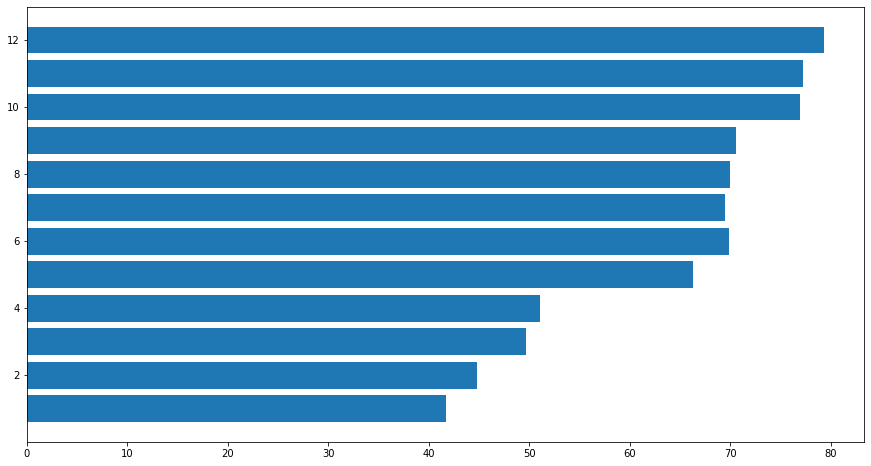

In [66]:
current_year=2009
dff=(stocks[stocks.Year.eq(current_year)].sort_values(by='Stocks_price_usd', ascending=True))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.Month, dff.Stocks_price_usd);

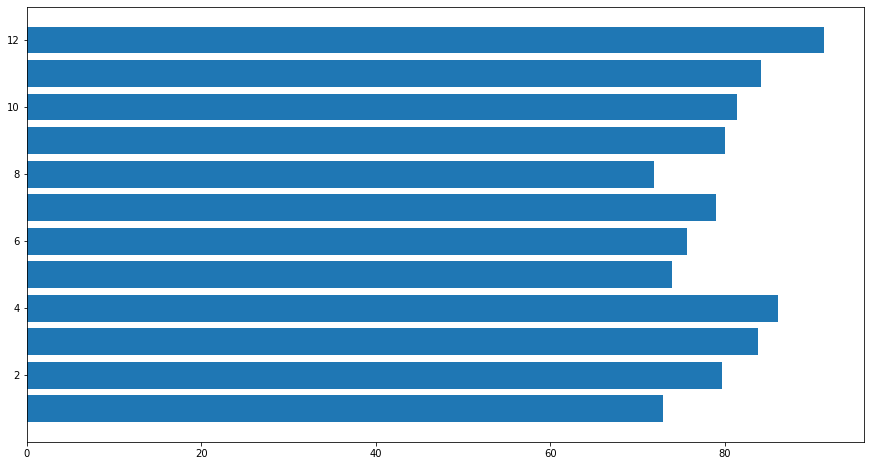

In [67]:
current_year=2010
dff=(stocks[stocks.Year.eq(current_year)].sort_values(by='Stocks_price_usd', ascending=True))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.Month, dff.Stocks_price_usd);

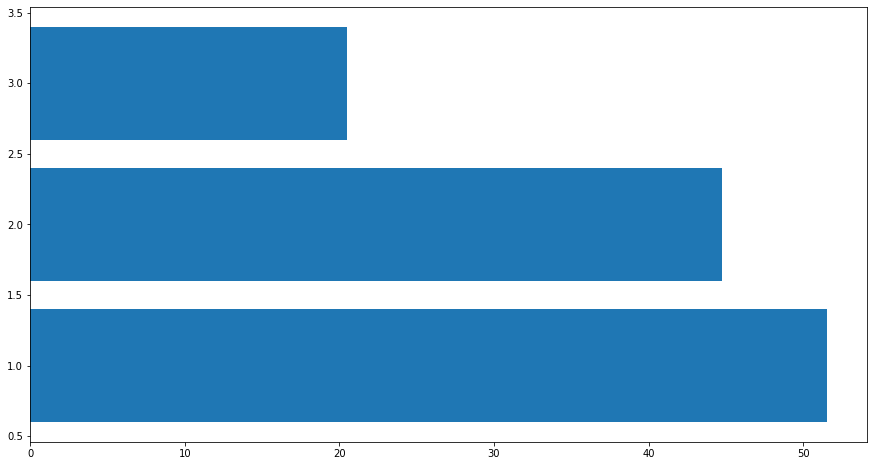

In [68]:
current_year=2020
dff=(stocks[stocks.Year.eq(current_year)].sort_values(by='Stocks_price_usd', ascending=True))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.Month, dff.Stocks_price_usd);

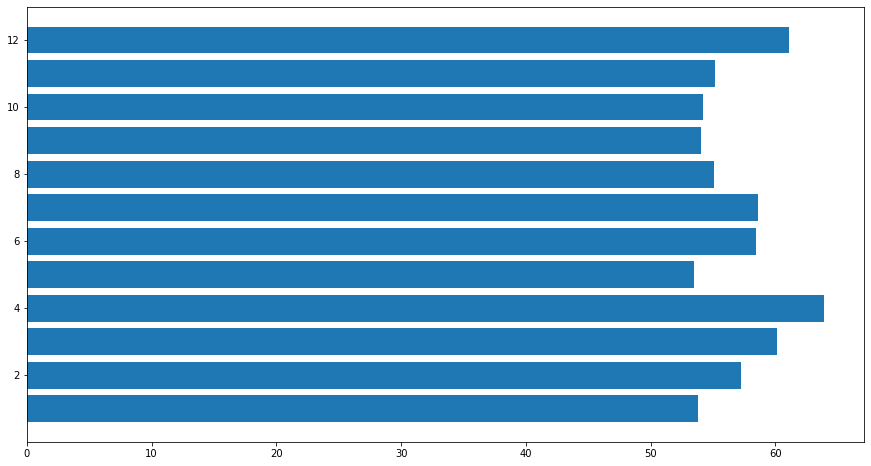

In [69]:
current_year=2019
dff=(stocks[stocks.Year.eq(current_year)].sort_values(by='Stocks_price_usd', ascending=True))

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.Month, dff.Stocks_price_usd);

In [70]:
crude.head()

,Date,(Dollars per Barrel)
0,Jan-1986,22.93
1,Feb-1986,15.46
2,Mar-1986,12.61
3,Apr-1986,12.84
4,May-1986,15.38


In [71]:
crude.rename(columns={'(Dollars per Barrel)': 'Crude_oil_price_usd'}, inplace=True)
crude.head()

,Date,Crude_oil_price_usd
0,Jan-1986,22.93
1,Feb-1986,15.46
2,Mar-1986,12.61
3,Apr-1986,12.84
4,May-1986,15.38


In [72]:
refiner.head()

,Date,U.S. Crude Oil Composite Acquisition Cost by Refiners (Dollars per Barrel)
0,Jan-1986,25.63
1,Feb-1986,19.76
2,Mar-1986,14.80
3,Apr-1986,13.05
4,May-1986,13.05


In [73]:
refiner.rename(columns={'U.S. Crude Oil Composite Acquisition Cost by Refiners (Dollars per Barrel)': 'Refiners_Cost_usd'}, inplace=True)
refiner.head()

,Date,Refiners_Cost_usd
0,Jan-1986,25.63
1,Feb-1986,19.76
2,Mar-1986,14.80
3,Apr-1986,13.05
4,May-1986,13.05


In [74]:
refiner['Date']=pd.to_datetime(refiner.Date)
refiner.head()

,Date,Refiners_Cost_usd
0,1986-01-01,25.63
1,1986-02-01,19.76
2,1986-03-01,14.80
3,1986-04-01,13.05
4,1986-05-01,13.05


In [75]:
refiner.sort_values(by='Date',inplace=True)
refiner.reset_index(drop=True,inplace=True)
refiner.head()

,Date,Refiners_Cost_usd
0,1986-01-01,25.63
1,1986-02-01,19.76
2,1986-03-01,14.80
3,1986-04-01,13.05
4,1986-05-01,13.05


In [76]:
refiner2=refiner.copy()

In [77]:
refiner['Year']=refiner.Date.dt.year
refiner.head()

,Date,Refiners_Cost_usd,Year
0,1986-01-01,25.63,1986
1,1986-02-01,19.76,1986
2,1986-03-01,14.80,1986
3,1986-04-01,13.05,1986
4,1986-05-01,13.05,1986


In [78]:
refiner['Month']=refiner.Date.dt.month
refiner.head()

,Date,Refiners_Cost_usd,Year,Month
0,1986-01-01,25.63,1986,1
1,1986-02-01,19.76,1986,2
2,1986-03-01,14.80,1986,3
3,1986-04-01,13.05,1986,4
4,1986-05-01,13.05,1986,5


In [79]:
refiner.drop(['Date'],axis=1,inplace=True)
refiner.head()

,Refiners_Cost_usd,Year,Month
0,25.63,1986,1
1,19.76,1986,2
2,14.80,1986,3
3,13.05,1986,4
4,13.05,1986,5


In [80]:
crude['Date']=pd.to_datetime(crude.Date)

In [81]:
crude2=crude.copy()

In [82]:
crude['Year']=crude.Date.dt.year
crude['Month']=crude.Date.dt.month
crude.drop(['Date'],axis=1,inplace=True)
crude.head()

,Crude_oil_price_usd,Year,Month
0,22.93,1986,1
1,15.46,1986,2
2,12.61,1986,3
3,12.84,1986,4
4,15.38,1986,5


In [83]:
stocks.shape

(411, 3)

In [84]:
crude.shape

(411, 3)

In [85]:
refiner.shape

(411, 3)

In [86]:
stocks2 = stocks2.set_index('Date')

In [87]:
stocks2.head()

,Stocks_price_usd
Date,
1986-01-01,18.83
1986-02-01,13.26
1986-03-01,10.42
1986-04-01,13.34
1986-05-01,14.30


In [88]:
crude2 = crude2.set_index('Date')
refiner2 = refiner2.set_index('Date')
crude2.head()

,Crude_oil_price_usd
Date,
1986-01-01,22.93
1986-02-01,15.46
1986-03-01,12.61
1986-04-01,12.84
1986-05-01,15.38


In [89]:
refiner2.head()

,Refiners_Cost_usd
Date,
1986-01-01,25.63
1986-02-01,19.76
1986-03-01,14.80
1986-04-01,13.05
1986-05-01,13.05


In [90]:
result = pd.merge(stocks2,
                 crude2,
                 on='Date')
result.head()

,Stocks_price_usd,Crude_oil_price_usd
Date,,
1986-01-01,18.83,22.93
1986-02-01,13.26,15.46
1986-03-01,10.42,12.61
1986-04-01,13.34,12.84
1986-05-01,14.30,15.38


In [91]:
result2 = pd.merge(result,
                 refiner2,
                 on='Date')
result2.head()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd
Date,,,
1986-01-01,18.83,22.93,25.63
1986-02-01,13.26,15.46,19.76
1986-03-01,10.42,12.61,14.80
1986-04-01,13.34,12.84,13.05
1986-05-01,14.30,15.38,13.05


In [92]:
result2.tail()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd
Date,,,
2019-11-01,55.17,57.03,57.88
2019-12-01,61.06,59.88,60.27
2020-01-01,51.56,57.52,57.94
2020-02-01,44.76,50.54,51.29
2020-03-01,20.48,29.21,32.72


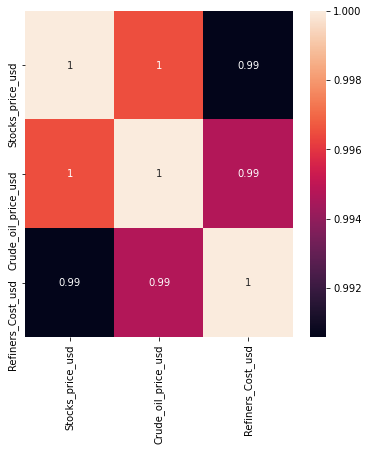

In [93]:
plt.figure(figsize=(6,6))

sns.heatmap(result2.corr(),annot=True);

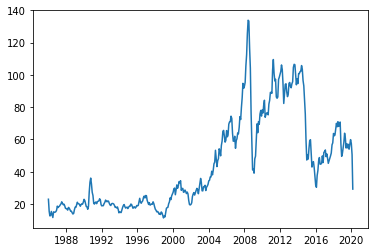

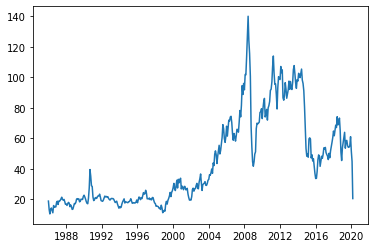

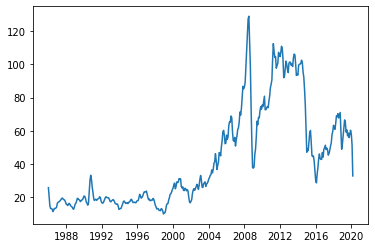

In [94]:
plt.plot(result2.Crude_oil_price_usd)
plt.show()
plt.plot(result2.Stocks_price_usd)
plt.show()
plt.plot(result2.Refiners_Cost_usd)

In [95]:
usd=pd.read_csv('usd.csv')
usd.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,Mar 2020,99.092,97.985,103.960,94.61,680.13K,1.03%
1,Feb 2020,98.081,97.245,99.815,97.23,352.62K,0.89%
2,Ene 2020,97.213,96.140,98.005,96.10,276.75K,1.20%
3,Dic 2019,96.058,98.210,98.320,96.02,279.73K,-2.18%
4,Nov 2019,98.202,97.110,98.495,96.96,229.80K,1.08%


In [96]:
usd.drop(['Apertura','Máximo','Mínimo','Vol.','% var.'],axis=1,inplace=True)

usd.rename(columns={'Fecha': 'Date', 'Cierre': 'usd'}, inplace=True)

In [97]:
usd['Date']=usd.Date.apply(lambda x:x.replace('Ene','Jan'))
usd['Date']=usd.Date.apply(lambda x:x.replace('Dic','Dec'))
usd['Date']=usd.Date.apply(lambda x:x.replace('Abr','Apr'))
usd['Date']=usd.Date.apply(lambda x:x.replace('Ago','Aug'))
usd['Date']=pd.to_datetime(usd.Date)

In [98]:
usd.sort_values(by='Date',inplace=True)
usd.reset_index(drop=True,inplace=True)
usd.head()

,Date,usd
0,1986-01-01,121.91
1,1986-02-01,115.15
2,1986-03-01,118.08
3,1986-04-01,112.62
4,1986-05-01,117.65


In [99]:
usd2=usd.copy()

In [100]:
usd = usd.set_index('Date')
usd.head()

,usd
Date,
1986-01-01,121.91
1986-02-01,115.15
1986-03-01,118.08
1986-04-01,112.62
1986-05-01,117.65


In [101]:
res = pd.merge(result2,
                 usd,
                 on='Date')
res.head()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd
Date,,,,
1986-01-01,18.83,22.93,25.63,121.91
1986-02-01,13.26,15.46,19.76,115.15
1986-03-01,10.42,12.61,14.80,118.08
1986-04-01,13.34,12.84,13.05,112.62
1986-05-01,14.30,15.38,13.05,117.65


In [102]:
def clean(df,x):

    df.drop(['Apertura','Máximo','Mínimo','Vol.','% var.'],axis=1,inplace=True)

    df.rename(columns={'Fecha': 'Date', 'Cierre': x}, inplace=True)

    df['Date']=df.Date.apply(lambda x:x.replace('Ene','Jan'))
    df['Date']=df.Date.apply(lambda x:x.replace('Dic','Dec'))
    df['Date']=df.Date.apply(lambda x:x.replace('Abr','Apr'))
    df['Date']=df.Date.apply(lambda x:x.replace('Ago','Aug'))
    df['Date']=pd.to_datetime(df.Date)

    df.sort_values(by='Date',inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df

In [103]:
t3=pd.read_csv('usd.csv')
t3.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,Mar 2020,99.092,97.985,103.960,94.61,680.13K,1.03%
1,Feb 2020,98.081,97.245,99.815,97.23,352.62K,0.89%
2,Ene 2020,97.213,96.140,98.005,96.10,276.75K,1.20%
3,Dic 2019,96.058,98.210,98.320,96.02,279.73K,-2.18%
4,Nov 2019,98.202,97.110,98.495,96.96,229.80K,1.08%


In [104]:
clean(t3,'preco')

,Date,preco
0,1986-01-01,121.910
1,1986-02-01,115.150
2,1986-03-01,118.080
3,1986-04-01,112.620
4,1986-05-01,117.650
...,...,...
406,2019-11-01,98.202
407,2019-12-01,96.058
408,2020-01-01,97.213
409,2020-02-01,98.081


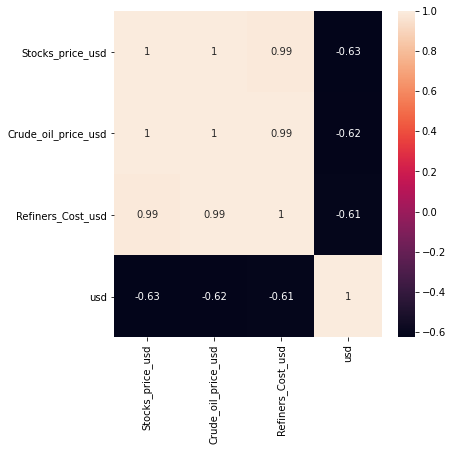

In [105]:
plt.figure(figsize=(6,6))

sns.heatmap(res.corr(),annot=True);

In [106]:
pan3=pd.read_csv('Pandemics.csv')

In [107]:
pan3=pan3.fillna('non')

In [108]:
pan3['Pandemics'] = np.where(pan3['Pandemics']=='non',0,1)
pan3.tail()

,Date,Pandemics
406,Nov-2019,0
407,Dec-2019,1
408,Jan-2020,1
409,Feb-2020,1
410,Mar-2020,1


In [109]:
pan3['Date']=pd.to_datetime(pan3.Date)
pan3.head()

,Date,Pandemics
0,1986-01-01,0
1,1986-02-01,0
2,1986-03-01,0
3,1986-04-01,0
4,1986-05-01,0


In [110]:
result = pd.merge(res,
                 pan3,
                 on='Date')
result.head()

,Date,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics
0,1986-01-01,18.83,22.93,25.63,121.91,0
1,1986-02-01,13.26,15.46,19.76,115.15,0
2,1986-03-01,10.42,12.61,14.80,118.08,0
3,1986-04-01,13.34,12.84,13.05,112.62,0
4,1986-05-01,14.30,15.38,13.05,117.65,0


In [111]:
result = result.set_index('Date')
result.head()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics
Date,,,,,
1986-01-01,18.83,22.93,25.63,121.91,0
1986-02-01,13.26,15.46,19.76,115.15,0
1986-03-01,10.42,12.61,14.80,118.08,0
1986-04-01,13.34,12.84,13.05,112.62,0
1986-05-01,14.30,15.38,13.05,117.65,0


In [112]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 411 entries, 1986-01-01 to 2020-03-01
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stocks_price_usd     411 non-null    float64
 1   Crude_oil_price_usd  411 non-null    float64
 2   Refiners_Cost_usd    411 non-null    float64
 3   usd                  411 non-null    float64
 4   Pandemics            411 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.3 KB


In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [114]:
train, test = result.Stocks_price_usd[:-10], result.Stocks_price_usd[-10:]

In [115]:
modelo=SARIMAX(train, order=(20, 1, 5)).fit(disp=False)
                     
pred=modelo.predict(len(train), len(result.Stocks_price_usd)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

/home/david/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/david/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/david/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Error mae:  10.920777253616988


,real,pred,diff
2019-06-01,58.47,48.892064,-9.577936
2019-07-01,58.58,47.515085,-11.064915
2019-08-01,55.10,47.222992,-7.877008
2019-09-01,54.07,46.247151,-7.822849
2019-10-01,54.18,46.764773,-7.415227
2019-11-01,55.17,45.961516,-9.208484
2019-12-01,61.06,48.603875,-12.456125
2020-01-01,51.56,51.767867,0.207867
2020-02-01,44.76,54.567340,9.807340
2020-03-01,20.48,54.250024,33.770024


In [116]:
from fbprophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

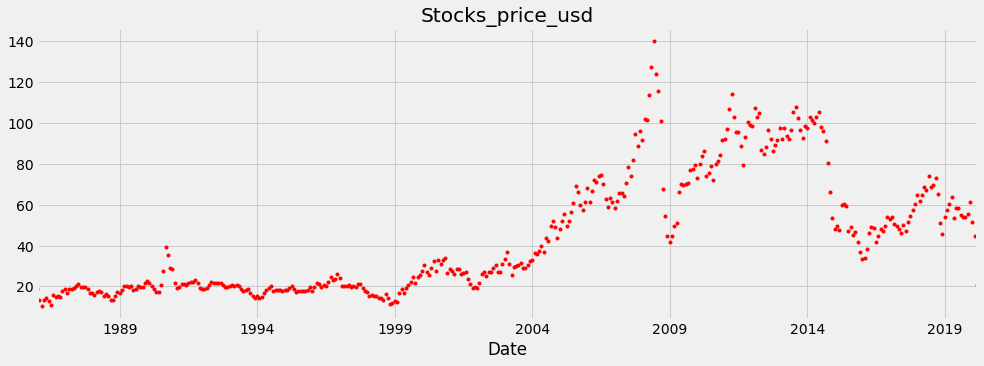

In [117]:
_=result.Stocks_price_usd.plot(style='.', figsize=(15, 5), color='r', title='Stocks_price_usd')

In [118]:
def features(df, label):
    df=df.copy()
    df['date']=df.index
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[[ 'quarter', 'month', 'year',
           'week_of_year']]
    y=df[label]
    
    return X,y

In [119]:
X, y = features(result, 'Stocks_price_usd')
data=pd.concat([X, y], axis=1)
data.head()

,quarter,month,year,week_of_year,Stocks_price_usd
Date,,,,,
1986-01-01,1,1,1986,1,18.83
1986-02-01,1,2,1986,5,13.26
1986-03-01,1,3,1986,9,10.42
1986-04-01,2,4,1986,14,13.34
1986-05-01,2,5,1986,18,14.30


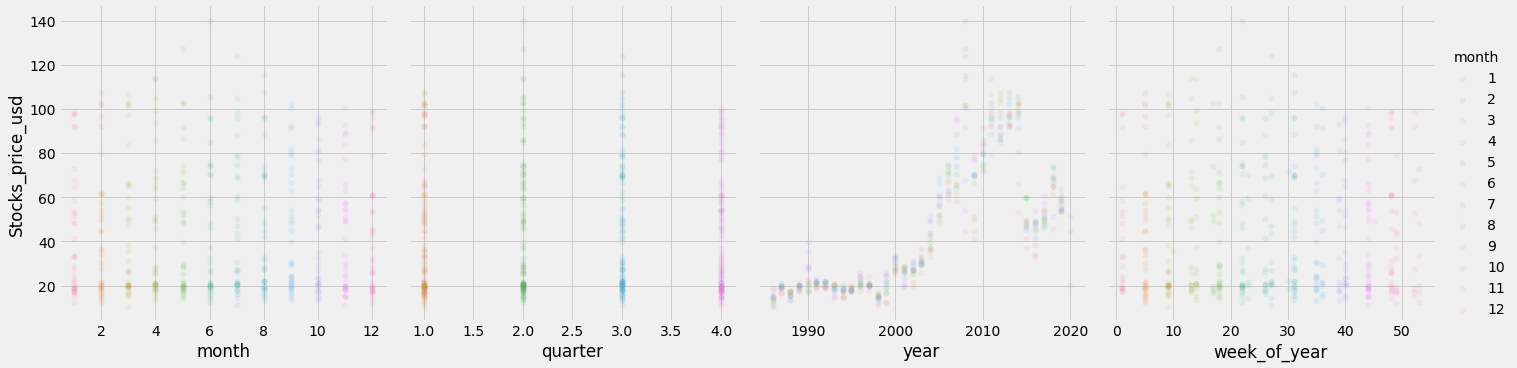

In [120]:
sns.pairplot(data.dropna(), hue='month', 
            x_vars=['month', 'quarter', 'year', 'week_of_year'],
            y_vars='Stocks_price_usd', height=5, plot_kws={'alpha':0.1, 'linewidth':0})
plt.show();

In [121]:
split_date='01-Jan-2005'

train=result.loc[result.index<=split_date].copy()
test=result.loc[result.index>split_date].copy()

In [122]:
train=train.reset_index().rename(columns={'Date':'ds', 'Stocks_price_usd':'y'})
test=test.reset_index().rename(columns={'Date':'ds', 'Stocks_price_usd':'y'})
train.head()

,ds,y,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics
0,1986-01-01,18.83,22.93,25.63,121.91,0
1,1986-02-01,13.26,15.46,19.76,115.15,0
2,1986-03-01,10.42,12.61,14.80,118.08,0
3,1986-04-01,13.34,12.84,13.05,112.62,0
4,1986-05-01,14.30,15.38,13.05,117.65,0


In [123]:
modelo=Prophet().fit(train)

pred=modelo.predict(test)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


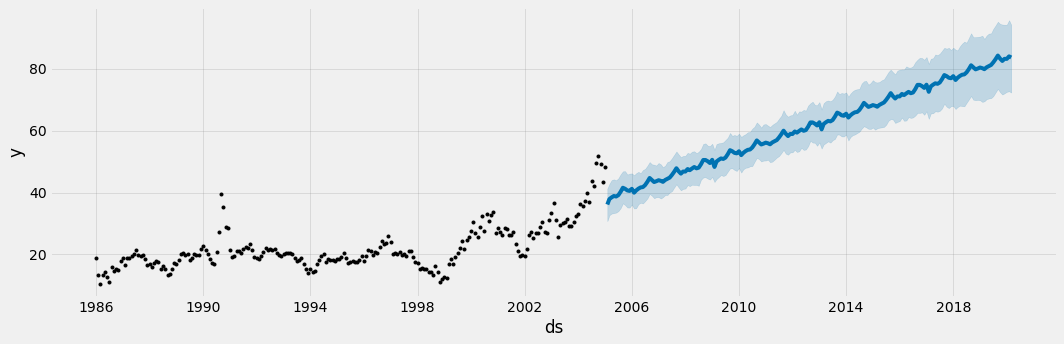

In [124]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig=modelo.plot(pred, ax=ax)

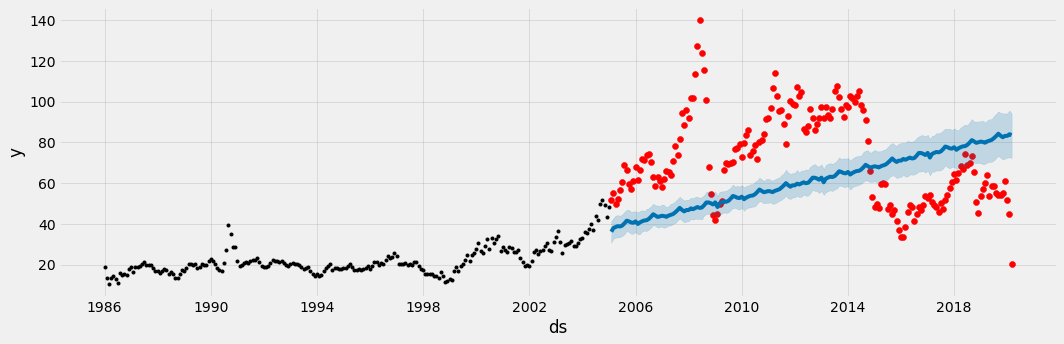

In [125]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [126]:
mean_squared_error(test.y, pred.yhat)**0.5

30.923257653308088

In [127]:
mean_absolute_error(test.y, pred.yhat)

27.62621488205311

In [128]:
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [129]:
mape(test.y, pred.yhat)

39.91709815701557

In [130]:
from statsmodels.tsa.arima_model import ARIMA

train, test = result.Stocks_price_usd[:-10], result.Stocks_price_usd[-10:]

modelo=ARIMA(train, order=(20, 1, 5)).fit(disp=False)

                     
pred=modelo.predict(len(train), len(result.Stocks_price_usd)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

/home/david/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/home/david/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Error mae:  50.82432418598142


/home/david/.local/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



,real,pred,diff
2019-06-01,58.47,-4.298825,-62.768825
2019-07-01,58.58,-1.106502,-59.686502
2019-08-01,55.10,0.554028,-54.545972
2019-09-01,54.07,-0.090308,-54.160308
2019-10-01,54.18,0.908813,-53.271187
2019-11-01,55.17,-0.592194,-55.762194
2019-12-01,61.06,3.129703,-57.930297
2020-01-01,51.56,3.957251,-47.602749
2020-02-01,44.76,2.978561,-41.781439
2020-03-01,20.48,-0.253770,-20.733770


In [131]:
from statsmodels.tsa.ar_model import AR
modelo=AR(train).fit()
pred=modelo.predict(len(train), len(result.Stocks_price_usd)-1)

error=(pred-test).abs().sum()/len(pred)

print(error)

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

/home/david/.local/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)


/home/david/.local/lib/python3.6/site-packages/st

10.4363222394238


,real,pred,diff
2019-06-01,58.47,49.457428,-9.012572
2019-07-01,58.58,48.941630,-9.638370
2019-08-01,55.10,48.724684,-6.375316
2019-09-01,54.07,46.544421,-7.525579
2019-10-01,54.18,47.052991,-7.127009
2019-11-01,55.17,47.074473,-8.095527
2019-12-01,61.06,49.685949,-11.374051
2020-01-01,51.56,52.434466,0.874466
2020-02-01,44.76,54.516382,9.756382
2020-03-01,20.48,55.063950,34.583950


In [132]:
import warnings
warnings.simplefilter('ignore')

for i in range(1, 100, 10):
    modelo=AR(train).fit(maxlag=i)                     # entrenar la AR
    pred=modelo.predict(len(train), len(result.Stocks_price_usd)-1)     # la prediccion en el intervalo
    error=(pred-test).abs().sum()/len(pred)            # error medio absoluto
    print ('Error mae: ', error, '  Maxlag : ', i)

Error mae:  6.590219159235443   Maxlag :  1
Error mae:  8.58645295813474   Maxlag :  11
Error mae:  10.521521142411805   Maxlag :  21
Error mae:  10.74328326390714   Maxlag :  31
Error mae:  9.85468819618968   Maxlag :  41
Error mae:  9.188299403594005   Maxlag :  51
Error mae:  8.742357402037618   Maxlag :  61
Error mae:  9.098343582993278   Maxlag :  71
Error mae:  8.854764406968958   Maxlag :  81
Error mae:  10.952749145152788   Maxlag :  91


In [133]:
from statsmodels.tsa.arima_model import ARMA
modelo=ARMA(train, order=(20, 2)).fit(disp=False)
pred=modelo.predict(len(train), len(result.Stocks_price_usd)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Error mae:  10.96652692282029


,real,pred,diff
2019-06-01,58.47,48.707393,-9.762607
2019-07-01,58.58,47.598168,-10.981832
2019-08-01,55.10,47.021496,-8.078504
2019-09-01,54.07,45.332733,-8.737267
2019-10-01,54.18,46.150441,-8.029559
2019-11-01,55.17,45.026807,-10.143193
2019-12-01,61.06,47.756098,-13.303902
2020-01-01,51.56,50.831781,-0.728219
2020-02-01,44.76,52.556660,7.796660
2020-03-01,20.48,52.583526,32.103526


In [134]:
from statsmodels.tsa.arima_model import ARIMA

modelo=ARIMA(train, order=(20, 1, 5)).fit(disp=False)

                     
pred=modelo.predict(len(train), len(result.Stocks_price_usd)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Error mae:  50.82432418598142


,real,pred,diff
2019-06-01,58.47,-4.298825,-62.768825
2019-07-01,58.58,-1.106502,-59.686502
2019-08-01,55.10,0.554028,-54.545972
2019-09-01,54.07,-0.090308,-54.160308
2019-10-01,54.18,0.908813,-53.271187
2019-11-01,55.17,-0.592194,-55.762194
2019-12-01,61.06,3.129703,-57.930297
2020-01-01,51.56,3.957251,-47.602749
2020-02-01,44.76,2.978561,-41.781439
2020-03-01,20.48,-0.253770,-20.733770


In [135]:
res2=result.copy()

In [136]:
res2.head()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics
Date,,,,,
1986-01-01,18.83,22.93,25.63,121.91,0
1986-02-01,13.26,15.46,19.76,115.15,0
1986-03-01,10.42,12.61,14.80,118.08,0
1986-04-01,13.34,12.84,13.05,112.62,0
1986-05-01,14.30,15.38,13.05,117.65,0


In [137]:
res2['id']=range(0,len(res2),1)
mid = res2['id']
res2.drop(labels=['id'], axis=1, inplace = True)
res2.insert(0, 'id', mid)

In [138]:
res2.head()

,id,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics
Date,,,,,,
1986-01-01,0,18.83,22.93,25.63,121.91,0
1986-02-01,1,13.26,15.46,19.76,115.15,0
1986-03-01,2,10.42,12.61,14.80,118.08,0
1986-04-01,3,13.34,12.84,13.05,112.62,0
1986-05-01,4,14.30,15.38,13.05,117.65,0


In [139]:
res2.set_index('id')
res2.head()

,id,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics
Date,,,,,,
1986-01-01,0,18.83,22.93,25.63,121.91,0
1986-02-01,1,13.26,15.46,19.76,115.15,0
1986-03-01,2,10.42,12.61,14.80,118.08,0
1986-04-01,3,13.34,12.84,13.05,112.62,0
1986-05-01,4,14.30,15.38,13.05,117.65,0


In [140]:
res2.reset_index(level=0, inplace=True)
res2.head()

,Date,id,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics
0,1986-01-01,0,18.83,22.93,25.63,121.91,0
1,1986-02-01,1,13.26,15.46,19.76,115.15,0
2,1986-03-01,2,10.42,12.61,14.80,118.08,0
3,1986-04-01,3,13.34,12.84,13.05,112.62,0
4,1986-05-01,4,14.30,15.38,13.05,117.65,0


In [141]:
res2.drop(['id'],axis=1,inplace=True)

In [142]:
res2['Month']=res2.Date.dt.month
res2['Year']=res2.Date.dt.year
res2.head()

,Date,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics,Month,Year
0,1986-01-01,18.83,22.93,25.63,121.91,0,1,1986
1,1986-02-01,13.26,15.46,19.76,115.15,0,2,1986
2,1986-03-01,10.42,12.61,14.80,118.08,0,3,1986
3,1986-04-01,13.34,12.84,13.05,112.62,0,4,1986
4,1986-05-01,14.30,15.38,13.05,117.65,0,5,1986


In [143]:
res2.drop(['Date'],axis=1,inplace=True)
res2.head()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics,Month,Year
0,18.83,22.93,25.63,121.91,0,1,1986
1,13.26,15.46,19.76,115.15,0,2,1986
2,10.42,12.61,14.80,118.08,0,3,1986
3,13.34,12.84,13.05,112.62,0,4,1986
4,14.30,15.38,13.05,117.65,0,5,1986


In [144]:
res2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stocks_price_usd     411 non-null    float64
 1   Crude_oil_price_usd  411 non-null    float64
 2   Refiners_Cost_usd    411 non-null    float64
 3   usd                  411 non-null    float64
 4   Pandemics            411 non-null    int64  
 5   Month                411 non-null    int64  
 6   Year                 411 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.6 KB


In [145]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from datetime import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVC
import xgboost as xgb

In [146]:
X=res2.drop('Stocks_price_usd', axis=1)
y=res2.Stocks_price_usd
X_train, X_test, y_train, y_test=tts(X, y)

In [147]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

In [148]:
space={
    'n_estimators':hp.quniform('n_estimators', 10, 2000, 5),
    
    'learning_rate':hp.uniform('learning_rate', 0.0001, 1.0),
    
    'max_depth':hp.quniform('x_max_depth', 2, 20, 1),
    
    'min_child_weight':hp.quniform('x_min_child', 1, 20, 1),
    
    'subsample':hp.uniform('x_subsample', 0.5, 1),
    
    'gamma':hp.uniform('x_gamma', 0.1, 0.8),
    
    'reg_lambda':hp.uniform('x_reg_lambda', 0, 1)
}

In [149]:
def objetivo(space):
    
    modelo=xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        min_child_weight=space['min_child_weight'],
        subsample=space['subsample'],
        gamma=space['gamma'],
        reg_lambda=space['reg_lambda'],
        objective='reg:squarederror'
    )
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss':rmse, 'status':STATUS_OK}

In [150]:
trials_reg=Trials()

best=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=20, trials=Trials())

best

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002517 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  5%|▌         | 1/20 [00:01<00:26,  1.40s/trial, best loss: 3.2425004255866345]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003187 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 3.242500


 10%|█         | 2/20 [00:02<00:24,  1.33s/trial, best loss: 3.2425004255866345]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002278 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 3.242500


 15%|█▌        | 3/20 [00:03<00:23,  1.35s/trial, best loss: 2.836074737101918] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002599 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 2.836075


 20%|██        | 4/20 [00:05<00:22,  1.39s/trial, best loss: 2.836074737101918]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002461 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 2.836075


 25%|██▌       | 5/20 [00:05<00:15,  1.04s/trial, best loss: 2.836074737101918]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002428 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 2.836075


 30%|███       | 6/20 [00:06<00:14,  1.02s/trial, best loss: 2.836074737101918]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002053 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 2.836075


 35%|███▌      | 7/20 [00:08<00:16,  1.27s/trial, best loss: 2.836074737101918]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001999 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 2.836075


 40%|████      | 8/20 [00:08<00:11,  1.00trial/s, best loss: 2.836074737101918]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001931 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 2.836075


 45%|████▌     | 9/20 [00:10<00:13,  1.26s/trial, best loss: 2.836074737101918]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002052 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 2.836075


 50%|█████     | 10/20 [00:11<00:11,  1.18s/trial, best loss: 2.639001615347496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001955 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss 2.639002


 55%|█████▌    | 11/20 [00:13<00:11,  1.32s/trial, best loss: 2.639001615347496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002022 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss 2.639002


 60%|██████    | 12/20 [00:15<00:12,  1.57s/trial, best loss: 2.639001615347496]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001939 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss 2.639002


 65%|██████▌   | 13/20 [00:16<00:09,  1.31s/trial, best loss: 2.308850723372794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001927 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss 2.308851


 70%|███████   | 14/20 [00:18<00:09,  1.52s/trial, best loss: 2.308850723372794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001953 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss 2.308851


 75%|███████▌  | 15/20 [00:18<00:06,  1.25s/trial, best loss: 2.308850723372794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002004 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss 2.308851


 80%|████████  | 16/20 [00:20<00:04,  1.22s/trial, best loss: 2.308850723372794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001928 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss 2.308851


 85%|████████▌ | 17/20 [00:22<00:04,  1.52s/trial, best loss: 2.308850723372794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001924 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss 2.308851


 90%|█████████ | 18/20 [00:24<00:03,  1.74s/trial, best loss: 2.308850723372794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001943 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss 2.308851


 95%|█████████▌| 19/20 [00:26<00:01,  1.90s/trial, best loss: 2.308850723372794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001932 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss 2.308851


100%|██████████| 20/20 [00:27<00:00,  1.37s/trial, best loss: 2.308850723372794]


{'learning_rate': 0.2509871812336986,
 'n_estimators': 590.0,
 'x_gamma': 0.20280933792351957,
 'x_max_depth': 6.0,
 'x_min_child': 4.0,
 'x_reg_lambda': 0.3291224967878228,
 'x_subsample': 0.8062987847679294}

In [151]:
modelo=xgb.XGBRegressor(
    n_estimators=int(best['n_estimators']),
    learning_rate=best['learning_rate'],
    x_max_depth=int(best['x_max_depth']),
    x_min_child=best['x_min_child'],
    x_subsample=best['x_subsample'],
    x_gamma=best['x_gamma'],
    x_reg_lambda=best['x_reg_lambda'],
    objective='reg:squarederror'
    )

In [152]:
modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)
mse(y_test, y_pred)

6.128058686988284

In [153]:
from sklearn.linear_model import SGDRegressor as SGDR
sgdr=SGDR()
sgdr.fit(X_train, y_train)
y_pred=sgdr.predict(X_test)
mse(y_test, y_pred)

7.715738794777184e+30

In [154]:
from sklearn.neighbors import KNeighborsRegressor as KNNR
knnr=KNNR()
knnr.fit(X_train, y_train)
y_pred=knnr.predict(X_test)
mse(y_test, y_pred)

7.544110174757284

In [155]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr=GBR()
gbr.fit(X_train, y_train)
y_pred=gbr.predict(X_test)
mse(y_test, y_pred)

5.311610124341356

In [156]:
from catboost import CatBoostRegressor as CTR
ctr=CTR(verbose=0)
ctr.fit(X_train, y_train)
y_pred=ctr.predict(X_test)
mse(y_test, y_pred)

6.072453749785591

In [157]:
from lightgbm import LGBMRegressor as LGBMR
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)
y_pred=lgbmr.predict(X_test)
mse(y_test, y_pred)

5.978245612797692

In [158]:
from sklearn.svm import SVR 
svr=SVR()
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)
mse(y_test, y_pred)

698.0361588836547

In [159]:
rfr=RFR()
rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)
mse(y_test, y_pred)

5.537828082427194

In [160]:
from sklearn.tree import ExtraTreeRegressor as ETR
etr=ETR()
etr.fit(X_train, y_train)
y_pred=etr.predict(X_test)
mse(y_test, y_pred)

14.414651456310683

In [161]:
from sklearn.neighbors import KNeighborsRegressor as KNNR
knnr=KNNR()
knnr.fit(X_train, y_train)
y_pred=knnr.predict(X_test)
mse(y_test, y_pred)

7.544110174757284

In [162]:
train_score=gbr.score(X_train, y_train) #R2
test_score=gbr.score(X_test, y_test)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: 0.998693391731768 -- test R2: 0.9921543176701165


In [163]:
from sklearn.tree import DecisionTreeRegressor as DTR
dtr=DTR()
dtr.fit(X_train, y_train)
y_pred=dtr.predict(X_test)
mse(y_test, y_pred)

7.018615533980586

In [164]:
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)
y_pred=lgbmr.predict(X_test)
mse(y_test, y_pred)

5.978245612797692

In [165]:
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [166]:
space={
    'n_estimators':hp.quniform('n_estimators', 10, 10000, 10),
    
    'learning_rate':hp.uniform('learning_rate', 0.0001, 1.0),
    
    'subsample':hp.uniform('x_subsample', 0.5, 1),
    
    'alpha':hp.uniform('x_alpha', 0.5, 0.9),
    
    'validation_fraction':hp.uniform('x_validation_fraction', 0.1, 0.4)
}

In [167]:
def objetivogbr(space):
    
    modelo=GBR(
        n_estimators=int(space['n_estimators']),
        learning_rate=space['learning_rate'],
        subsample=space['subsample'],
        alpha=space['alpha'],
        validation_fraction=space['validation_fraction']
    
    )
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss':rmse, 'status':STATUS_OK}

In [168]:
trials_reg=Trials()

best=fmin(fn=objetivogbr, space=space, algo=tpe.suggest, max_evals=20, trials=Trials())

best

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001446 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  5%|▌         | 1/20 [00:02<00:43,  2.32s/trial, best loss: 2.857999511089945]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001745 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.858000


 10%|█         | 2/20 [00:02<00:31,  1.74s/trial, best loss: 2.5642192318645525]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001918 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 2.564219


 15%|█▌        | 3/20 [00:05<00:36,  2.17s/trial, best loss: 2.5642192318645525]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001753 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 2.564219


 20%|██        | 4/20 [00:08<00:39,  2.45s/trial, best loss: 2.5642192318645525]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001937 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 2.564219


 25%|██▌       | 5/20 [00:10<00:34,  2.30s/trial, best loss: 2.5642192318645525]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001851 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 2.564219


 30%|███       | 6/20 [00:16<00:44,  3.19s/trial, best loss: 2.473264136543575] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001803 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 2.473264


 35%|███▌      | 7/20 [00:18<00:39,  3.07s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001763 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 2.473264


 40%|████      | 8/20 [00:21<00:35,  2.99s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001728 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 2.473264


 45%|████▌     | 9/20 [00:23<00:30,  2.74s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001772 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 2.473264


 50%|█████     | 10/20 [00:26<00:26,  2.65s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001834 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss 2.473264


 55%|█████▌    | 11/20 [00:28<00:22,  2.51s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001738 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss 2.473264


 60%|██████    | 12/20 [00:29<00:15,  1.96s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001500 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss 2.473264


 65%|██████▌   | 13/20 [00:31<00:13,  1.95s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001758 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss 2.473264


 70%|███████   | 14/20 [00:33<00:11,  1.98s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001761 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss 2.473264


 75%|███████▌  | 15/20 [00:34<00:09,  1.88s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001821 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss 2.473264


 80%|████████  | 16/20 [00:35<00:06,  1.64s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001734 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss 2.473264


 85%|████████▌ | 17/20 [00:38<00:05,  1.77s/trial, best loss: 2.473264136543575]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001790 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss 2.473264


 90%|█████████ | 18/20 [00:40<00:03,  1.91s/trial, best loss: 2.422130233093058]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001815 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss 2.422130


 95%|█████████▌| 19/20 [00:41<00:01,  1.62s/trial, best loss: 2.422130233093058]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001577 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss 2.422130


100%|██████████| 20/20 [00:43<00:00,  2.19s/trial, best loss: 2.422130233093058]


{'learning_rate': 0.1136185544071266,
 'n_estimators': 5280.0,
 'x_alpha': 0.6204024879577211,
 'x_subsample': 0.5889405608664113,
 'x_validation_fraction': 0.28553383911606434}

In [179]:
modelo2=GBR(
    n_estimators=int(best['n_estimators']),
    learning_rate=best['learning_rate'],
    subsample= 0.5889405608664113,
    alpha=best['x_alpha'],
    validation_fraction=best['x_validation_fraction'],
    )

In [180]:
modelo2.fit(X_train, y_train)
y_pred=modelo2.predict(X_test)
mse(y_test, y_pred)

6.308462117183268

In [182]:
train_score=gbr.score(X_train, y_train) #R2
test_score=gbr.score(X_test, y_test)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: 0.998693391731768 -- test R2: 0.9921099692931449


In [181]:
gbr=GBR()
gbr.fit(X_train, y_train)
y_pred=gbr.predict(X_test)
mse(y_test, y_pred)

5.3416344457727565

In [172]:
pred=res2.drop('Stocks_price_usd', axis=1)
pred.head()

,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics,Month,Year
0,22.93,25.63,121.91,0,1,1986
1,15.46,19.76,115.15,0,2,1986
2,12.61,14.80,118.08,0,3,1986
3,12.84,13.05,112.62,0,4,1986
4,15.38,13.05,117.65,0,5,1986


In [183]:
resx1=gbr.predict(pred)

In [184]:
dfx1 = pd.DataFrame(resx1,columns=['Predictions'])
dfx1.head()

,Predictions
0,26.319461
1,14.164957
2,13.201709
3,13.324782
4,14.916544


In [185]:
result = pd.merge(res2,
                 dfx1,
                 left_index=True,
                 right_index=True)
result.head()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics,Month,Year,Predictions
0,18.83,22.93,25.63,121.91,0,1,1986,26.319461
1,13.26,15.46,19.76,115.15,0,2,1986,14.164957
2,10.42,12.61,14.80,118.08,0,3,1986,13.201709
3,13.34,12.84,13.05,112.62,0,4,1986,13.324782
4,14.30,15.38,13.05,117.65,0,5,1986,14.916544


In [186]:
result.tail()

,Stocks_price_usd,Crude_oil_price_usd,Refiners_Cost_usd,usd,Pandemics,Month,Year,Predictions
406,55.17,57.03,57.88,98.202,0,11,2019,55.894253
407,61.06,59.88,60.27,96.058,1,12,2019,60.035973
408,51.56,57.52,57.94,97.213,1,1,2020,52.117278
409,44.76,50.54,51.29,98.081,1,2,2020,44.077825
410,20.48,29.21,32.72,99.092,1,3,2020,21.012249


In [178]:
result.Pandemics.unique()

array([0, 1])

In [187]:
import pickle

In [188]:
filename = 'finalized_model.sav'
pickle.dump(gbr, open(filename, 'wb'))

In [193]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9921099692931449
